In [47]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [49]:
img_width, img_height = 512, 512

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 955
nb_validation_samples = 88
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [50]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [52]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('weights.h5')

Found 955 images belonging to 2 classes.
Found 88 images belonging to 2 classes.
Epoch 1/10
59/59 [==============================] - 424s 7s/step - loss: 0.7272 - acc: 0.7481 - val_loss: 0.1835 - val_acc: 0.9125
Epoch 2/10
59/59 [==============================] - 416s 7s/step - loss: 0.1766 - acc: 0.9417 - val_loss: 0.0351 - val_acc: 0.9861
Epoch 3/10
59/59 [==============================] - 410s 7s/step - loss: 0.1011 - acc: 0.9656 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 4/10
59/59 [==============================] - 388s 7s/step - loss: 0.0784 - acc: 0.9768 - val_loss: 0.1540 - val_acc: 0.9306
Epoch 5/10
59/59 [==============================] - 395s 7s/step - loss: 0.0472 - acc: 0.9820 - val_loss: 8.4219e-05 - val_acc: 1.0000
Epoch 6/10
59/59 [==============================] - 409s 7s/step - loss: 0.0501 - acc: 0.9799 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 7/10
59/59 [==============================] - 390s 7s/step - loss: 0.0261 - acc: 0.9926 - val_loss: 0.0080 - val_acc: 1.000

[[1]]


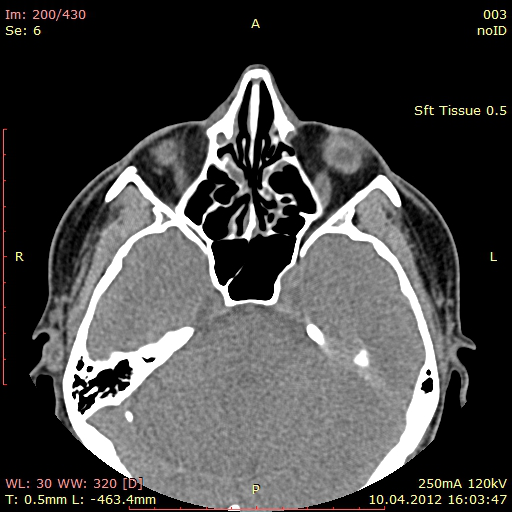

In [60]:
img = load_img('test/1_1.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
print(model.predict_classes(x))
img